In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from sqlalchemy import create_engine
import psycopg2
import plotly.figure_factory as ff
import os
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')

In [2]:
import numpy as np
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from sqlalchemy import create_engine
import psycopg2
import plotly.figure_factory as ff
import os
import plotly.express as px
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')
import dash_bootstrap_components as dbc
import pymongo
from bson.json_util import loads, dumps
mongo_username = os.getenv('MONGO_INITDB_ROOT_USERNAME')
mongo_password = os.getenv('MONGO_INITDB_ROOT_PASSWORD')
mongo_init_db = os.getenv('MONGO_INITDB_DATABASE')
import wordcloud
import matplotlib.pyplot as plt

In [3]:
covid_data = pd.read_csv("owid-covid-data.csv")

In [4]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
# Get the list of column names
column_names = covid_data.columns
print(column_names)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# 1. Data Summary
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355599 entries, 0 to 355598
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    355599 non-null  object 
 1   continent                                   338653 non-null  object 
 2   location                                    355599 non-null  object 
 3   date                                        355599 non-null  object 
 4   total_cases                                 317456 non-null  float64
 5   new_cases                                   345855 non-null  float64
 6   new_cases_smoothed                          344596 non-null  float64
 7   total_deaths                                295737 non-null  float64
 8   new_deaths                                  345907 non-null  float64
 9   new_deaths_smoothed                         344677 non-null  float64
 

In [7]:
##Data Summary
print(covid_data.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.174560e+05  3.458550e+05        3.445960e+05  2.957370e+05   
mean   6.796974e+06  9.457200e+03        9.491605e+03  8.666838e+04   
std    4.123893e+07  1.094194e+05        9.374232e+04  4.426444e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    8.285000e+03  0.000000e+00        2.860000e-01  1.280000e+02   
50%    7.143600e+04  1.000000e+00        2.357100e+01  1.341000e+03   
75%    7.667340e+05  2.510000e+02        4.821430e+02  1.198800e+04   
max    7.718202e+08  8.401960e+06        6.402036e+06  6.978162e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  345907.00000        344677.000000            317456.000000   
mean       84.23524            84.532007            103457.466834   
std       608.98649           554.835927            152731.556394   
min         0.00000             0.000000                 0.000000   
25%         0.0

In [8]:
missing_values_count = covid_data.isnull().sum()
print(missing_values_count)


iso_code                                        0
continent                                   16946
location                                        0
date                                            0
total_cases                                 38143
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       343388
excess_mortality_cumulative                343388
excess_mortality                           343388
excess_mortality_cumulative_per_million    343388
Length: 67, dtype: int64


In [9]:

missing_values_percentage = (covid_data.isnull().sum() / len(covid_data)) * 100
#pd.set_option('display.max_rows', 50)
print(missing_values_percentage)


iso_code                                    0.000000
continent                                   4.765480
location                                    0.000000
date                                        0.000000
total_cases                                10.726408
                                             ...    
population                                  0.000000
excess_mortality_cumulative_absolute       96.566076
excess_mortality_cumulative                96.566076
excess_mortality                           96.566076
excess_mortality_cumulative_per_million    96.566076
Length: 67, dtype: float64


Data cleaning Stage. Consider converting the data from object (String) into
datetime format

In [10]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [11]:
covid_data['date']

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
355594   2023-11-05
355595   2023-11-06
355596   2023-11-07
355597   2023-11-08
355598   2023-11-09
Name: date, Length: 355599, dtype: datetime64[ns]

checking to drop duplicates in the dataset

In [12]:
covid_data = covid_data.drop_duplicates()

In [13]:
# Identify columns where the percentage of missing values is greater than 50%
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

# Drop these columns from the dataset
covid_data_cleaned = covid_data.drop(columns=columns_to_drop)

In [14]:

covid_data_cleaned

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355594,ZWE,Africa,Zimbabwe,2023-11-05,265848.0,0.0,0.0,5723.0,0.0,0.0,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
355595,ZWE,Africa,Zimbabwe,2023-11-06,265848.0,0.0,0.0,5723.0,0.0,0.0,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
355596,ZWE,Africa,Zimbabwe,2023-11-07,265848.0,0.0,0.0,5723.0,0.0,0.0,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
355597,ZWE,Africa,Zimbabwe,2023-11-08,265848.0,0.0,0.0,5723.0,0.0,0.0,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


In [16]:
##Checking for anomalies. Thus ensuring there are no negative values in columns 
##where negatives wont make sense by clipping them to zero

cols_to_check = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
covid_data_cleaned[cols_to_check] = covid_data_cleaned[cols_to_check].clip(lower=0)


In [17]:
###Checking the columns for the cleaned dataset

cleaned_column_names = covid_data_cleaned.columns
print(cleaned_column_names)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'population'],
      dtype='object')


In [18]:
#Exporting the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_covid_data.csv' 
covid_data_cleaned.to_csv(cleaned_file_path, index=False)


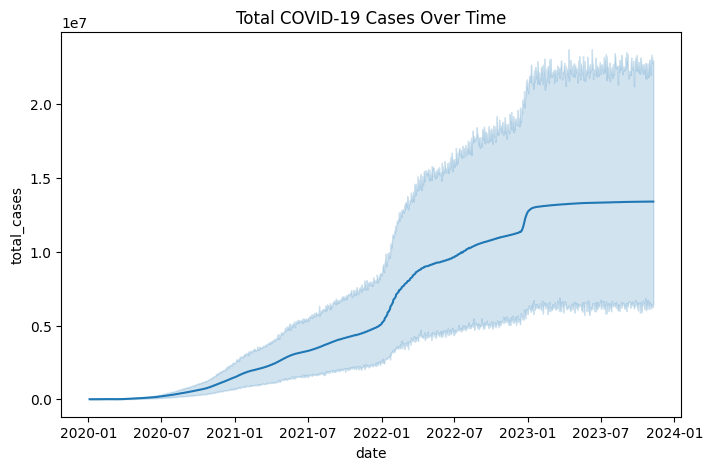

In [19]:
# Time series plot for total cases
plt.figure(figsize=(8, 5))
sns.lineplot(data=covid_data_cleaned, x='date', y='total_cases')
plt.title('Total COVID-19 Cases Over Time')
plt.show()

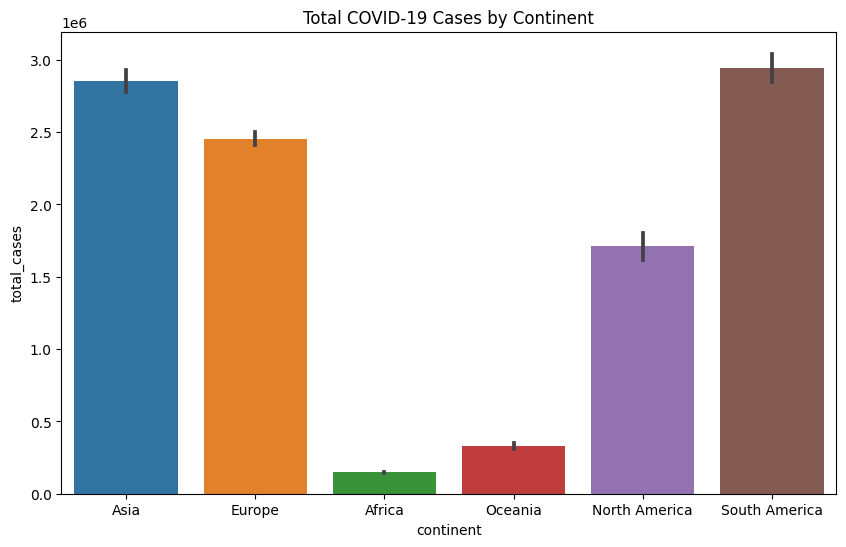

In [20]:
# COVID-19 cases by continent
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='total_cases', data=covid_data_cleaned)
plt.title('Total COVID-19 Cases by Continent')
plt.show()

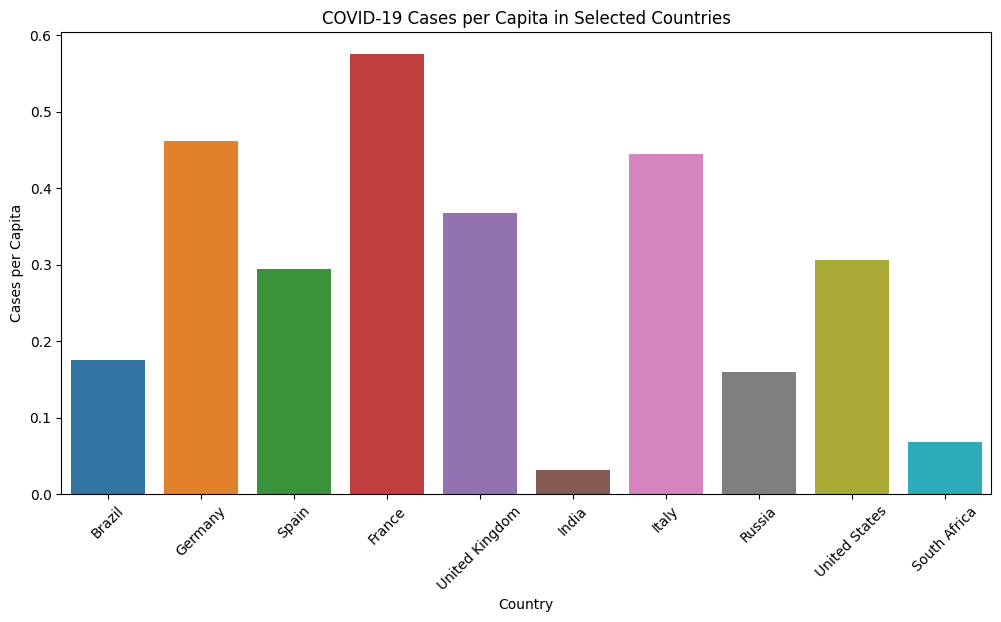

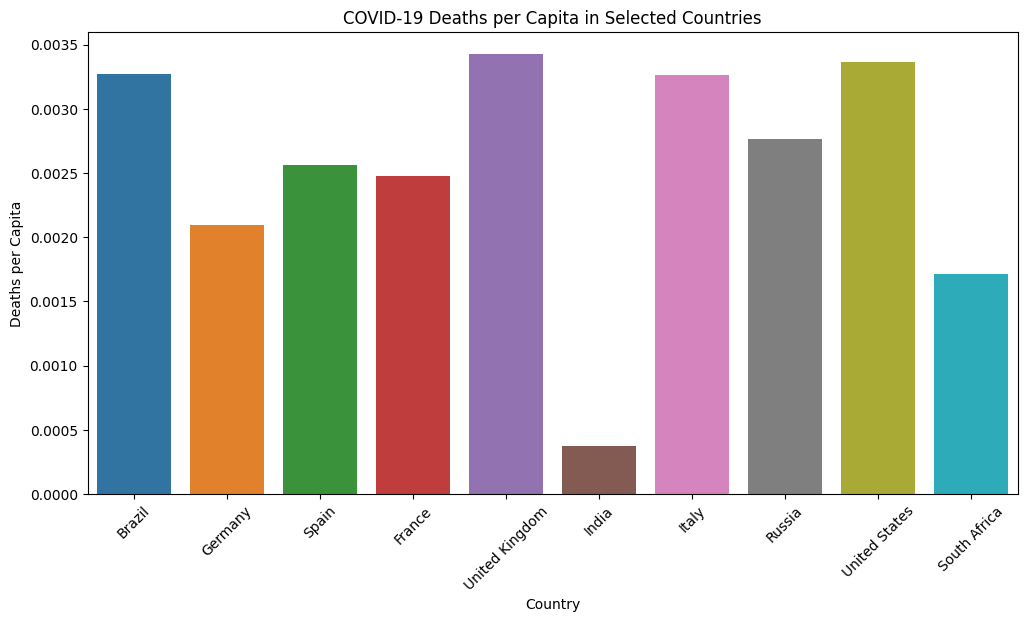

In [21]:
# Calculate cases and deaths per capita

covid_data_cleaned['cases_per_capita'] = covid_data_cleaned['total_cases'] / covid_data_cleaned['population']
covid_data_cleaned['deaths_per_capita'] = covid_data_cleaned['total_deaths'] / covid_data_cleaned['population']

# Selecting a few countries for comparison
selected_countries = ['USA', 'BRA', 'IND', 'RUS', 'ZAF', 'GBR', 'FRA', 'ITA', 'ESP', 'DEU']

# Filtering data for these countries
selected_data = covid_data_cleaned[covid_data_cleaned['iso_code'].isin(selected_countries)]

# Getting the latest data for each country
latest_selected_data = selected_data.groupby('iso_code').last().reset_index()

# Plotting cases per capita
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='cases_per_capita', data=latest_selected_data)
plt.title('COVID-19 Cases per Capita in Selected Countries')
plt.ylabel('Cases per Capita')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# Plotting deaths per capita
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='deaths_per_capita', data=latest_selected_data)
plt.title('COVID-19 Deaths per Capita in Selected Countries')
plt.ylabel('Deaths per Capita')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Aggregating total cases for each country over the entire period
countrywise_total_cases = covid_data_cleaned.groupby('iso_code')['total_cases'].max()

# Resetting index to make 'iso_code' a column
countrywise_total_cases = countrywise_total_cases.reset_index()

countrywise_total_cases.head()


,iso_code,total_cases
0,ABW,44224.0
1,AFG,227885.0
2,AGO,105978.0
3,AIA,3904.0
4,ALB,334090.0


/tmp/ipykernel_154/165929977.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


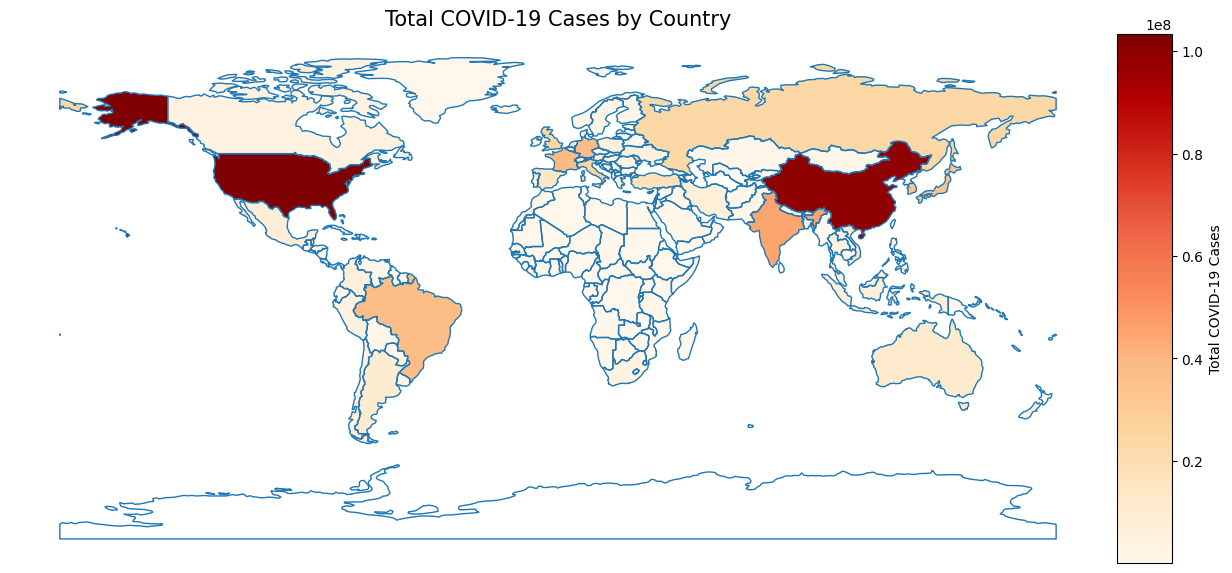

In [23]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the aggregated data
world = world.merge(countrywise_total_cases, how='left', left_on='iso_a3', right_on='iso_code')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='total_cases', ax=ax, legend=True, cax=cax, cmap='OrRd',
           legend_kwds={'label': "Total COVID-19 Cases"})
ax.set_title('Total COVID-19 Cases by Country', fontsize=15)
ax.set_axis_off()
plt.show()


In [24]:
# Creating the country_profile DataFrame
country_profile_columns = [
    'iso_code', 'continent', 'location', 'population', 'gdp_per_capita', 
    'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 
    'diabetes_prevalence', 'female_smokers', 'male_smokers', 
    'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 
    'population_density', 'median_age'
]

# Dropping duplicates since we only need unique values for each country
country_profile_df = covid_data_cleaned[country_profile_columns].drop_duplicates()


In [25]:
# Creating the covid_daily_stats DataFrame
covid_daily_stats_columns = [
    'iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 
    'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
    'total_cases_per_million', 'new_cases_per_million', 
    'new_cases_smoothed_per_million', 'total_deaths_per_million', 
    'new_deaths_per_million', 'new_deaths_smoothed_per_million', 
    'reproduction_rate', 'location'
]

covid_daily_stats_df = covid_data_cleaned[covid_daily_stats_columns].drop_duplicates()


In [26]:
# Creating the covid_vaccination_stats DataFrame
covid_vaccination_stats_columns = [
    'iso_code', 'date', 'new_vaccinations_smoothed', 
    'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 
    'new_people_vaccinated_smoothed_per_hundred', 'continent'
]

covid_vaccination_stats_df = covid_data_cleaned[covid_vaccination_stats_columns].drop_duplicates()


In [27]:
# Creating the government_response DataFrame
government_response_columns = ['iso_code', 'date', 'stringency_index']

government_response_df = covid_data_cleaned[government_response_columns].drop_duplicates()


In [28]:
engine = create_engine("postgresql+psycopg2://{user}:{pw}@{service}/{db}".format (
    user = 'postgres',
    pw = POSTGRES_PASSWORD,
    service = 'postgres',
    db = 'covid'
))

In [29]:
dbserver = psycopg2.connect(
     user = 'postgres',
     password = POSTGRES_PASSWORD,
     host = 'postgres',
     #host = 'host.docker.internal',
     port= '5432'   
)
dbserver.autocommit = True

In [30]:
cursor = dbserver.cursor()

In [32]:
cursor.execute("SELECT datname FROM pg_database")


In [33]:
cursor.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
for table in cursor.fetchall():
    print(table)

In [34]:
# Execute a query to list all databases
cursor.execute("SELECT datname FROM pg_database")

    # Fetch and print the results
databases = cursor.fetchall()
for db in databases:
    print(db[0])

postgres
template1
template0
congress
cardib
nba
covid


In [35]:
country_profile_df.to_sql('country_profile', engine, chunksize =1000, if_exists='replace', index=False)

255

In [36]:
covid_daily_stats_df.to_sql('covid_daily_stats_df', engine,  chunksize =1000, if_exists='replace', index=False)

355599

In [37]:
covid_vaccination_stats_df.to_sql('covid_vaccination_stats_df', engine,  chunksize =1000, if_exists='replace', index=False)


355599

In [38]:

government_response_df.to_sql('government_response_df', engine,  chunksize =1000, if_exists='replace', index=False)


355599

In [39]:
myquery = '''

SELECT *
FROM country_profile

'''
pd.read_sql_query(myquery, con= engine)


,iso_code,continent,location,population,gdp_per_capita,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population_density,median_age
0,AFG,Asia,Afghanistan,4.112877e+07,1803.987,2.581,1.337,597.029,9.59,NaN,NaN,0.500,64.83,0.511,54.422,18.6
1,OWID_AFR,None,Africa,1.426737e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2.842318e+06,11803.431,13.188,8.643,304.195,10.08,7.100,51.200,2.890,78.57,0.795,104.871,38.0
3,DZA,Africa,Algeria,4.490323e+07,13913.839,6.211,3.857,278.364,6.73,0.700,30.400,1.900,76.88,0.748,17.348,29.1
4,ASM,Oceania,American Samoa,4.429500e+04,NaN,NaN,NaN,283.750,NaN,NaN,NaN,NaN,73.74,NaN,278.205,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,ESH,Africa,Western Sahara,5.760050e+05,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN,NaN,28.4
251,OWID_WRL,None,World,7.975105e+09,15469.207,8.696,5.355,233.070,8.51,6.434,34.635,2.705,72.58,0.737,58.045,30.9
252,YEM,Asia,Yemen,3.369661e+07,1479.147,2.922,1.583,495.003,5.35,7.600,29.200,0.700,66.12,0.470,53.508,20.3
253,ZMB,Africa,Zambia,2.001767e+07,3689.251,2.480,1.542,234.499,3.94,3.100,24.700,2.000,63.89,0.584,22.995,17.7


In [40]:
myquery = '''

SELECT *
FROM government_response_df

'''
pd.read_sql_query(myquery, con= engine)


,iso_code,date,stringency_index
0,AFG,2020-01-03,0.0
1,AFG,2020-01-04,0.0
2,AFG,2020-01-05,0.0
3,AFG,2020-01-06,0.0
4,AFG,2020-01-07,0.0
...,...,...,...
355594,ZWE,2023-11-05,NaN
355595,ZWE,2023-11-06,NaN
355596,ZWE,2023-11-07,NaN
355597,ZWE,2023-11-08,NaN


In [41]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [42]:
##Comparing total cases and total dates per day

myquery = '''
    SELECT date, total_cases, total_deaths 
    FROM covid_daily_stats_df 
    WHERE iso_code = 'USA' 
    ORDER BY date
    LIMIT 1000
'''


pd.read_sql_query(myquery, con= engine)



,date,total_cases,total_deaths
0,2020-01-03,NaN,NaN
1,2020-01-04,NaN,NaN
2,2020-01-05,NaN,NaN
3,2020-01-06,NaN,NaN
4,2020-01-07,NaN,NaN
...,...,...,...
995,2022-09-24,94729904.0,1045722.0
996,2022-09-25,94783304.0,1046067.0
997,2022-09-26,94799175.0,1046169.0
998,2022-09-27,94814470.0,1046254.0


In [43]:
# Comparing COVID-19 impact between countries with different GDP per capita.

myquery = '''

SELECT p.iso_code, p.gdp_per_capita, c.total_cases, c.total_deaths
FROM country_profile p
JOIN covid_daily_stats_df c ON p.iso_code = c.iso_code
WHERE c.date = '2023-01-01' 
ORDER BY p.gdp_per_capita DESC


'''


pd.read_sql_query(myquery, con= engine)





,iso_code,gdp_per_capita,total_cases,total_deaths
0,OWID_ASI,NaN,276901346.0,1539378.0
1,OWID_AFR,NaN,13001383.0,258511.0
2,PCN,NaN,4.0,NaN
3,MNP,NaN,13395.0,41.0
4,ASM,NaN,8285.0,34.0
...,...,...,...,...
248,NER,926.000,9504.0,315.0
249,COD,808.133,95172.0,1462.0
250,LBR,752.788,8055.0,294.0
251,BDI,702.225,52162.0,15.0


In [44]:
#Analyzing the correlation between health indicators (like diabetes prevalence, smoking rates) and COVID-19 severity.

myquery= '''

SELECT p.iso_code, p.diabetes_prevalence, p.female_smokers, p.male_smokers, c.total_cases, c.total_deaths
FROM country_profile p
JOIN covid_daily_stats_df c ON p.iso_code = c.iso_code
WHERE c.date = '2023-01-01';


'''
pd.read_sql_query(myquery, con= engine)


,iso_code,diabetes_prevalence,female_smokers,male_smokers,total_cases,total_deaths
0,AFG,9.59,NaN,NaN,207579.0,7849.0
1,OWID_AFR,NaN,NaN,NaN,13001383.0,258511.0
2,ALB,10.08,7.1,51.2,332794.0,3596.0
3,DZA,6.73,0.7,30.4,271217.0,6881.0
4,ASM,NaN,NaN,NaN,8285.0,34.0
...,...,...,...,...,...,...
248,URY,6.93,14.0,19.9,1020161.0,7570.0
249,VUT,12.02,2.8,34.5,12014.0,14.0
250,VAT,NaN,NaN,NaN,26.0,NaN
251,VNM,6.00,1.0,45.9,11525231.0,43186.0


In [45]:
 #Investigating the evolution of new cases and vaccinations over time.

myquery= '''

SELECT d.date, d.new_cases, v.new_vaccinations_smoothed
FROM covid_daily_stats_df d
JOIN covid_vaccination_stats_df v ON d.iso_code = v.iso_code AND d.date = v.date
WHERE d.iso_code = 'BRA' AND d.date BETWEEN '2022-01-01' AND '2023-06-30'



'''
pd.read_sql_query(myquery, con= engine)


,date,new_cases,new_vaccinations_smoothed
0,2022-08-02,20313.0,20075.0
1,2022-08-03,22064.0,20075.0
2,2022-08-04,34464.0,20075.0
3,2022-08-05,33633.0,20075.0
4,2022-08-06,40433.0,20075.0
...,...,...,...
541,2022-07-28,37914.0,241118.0
542,2022-07-29,44514.0,167437.0
543,2022-07-30,44592.0,93756.0
544,2022-07-31,41713.0,20075.0


In [46]:
# Query to get the unique list of countries from the country_profile table
country_query = "SELECT DISTINCT location, iso_code FROM country_profile"
df_countries = pd.read_sql_query(country_query, engine)

# Creating the dropdown options
country_options = [{'label': row['location'], 'value': row['iso_code']} for index, row in df_countries.iterrows()]



In [47]:
# Query to get distinct continents from the country_profile table
continent_query = "SELECT DISTINCT continent FROM country_profile"
df_continents = pd.read_sql_query(continent_query, engine)

# Create the dropdown options
continent_options = [{'label': continent, 'value': continent} for continent in df_continents['continent'].dropna().unique()]
continent_options

[{'label': 'Asia', 'value': 'Asia'},
 {'label': 'South America', 'value': 'South America'},
 {'label': 'North America', 'value': 'North America'},
 {'label': 'Oceania', 'value': 'Oceania'},
 {'label': 'Africa', 'value': 'Africa'},
 {'label': 'Europe', 'value': 'Europe'}]

In [49]:
# Initialize the Dash app
app = dash.Dash(__name__)

# App layout with multiple tabs
app.layout = html.Div([
    html.H1("COVID-19 Dashboard"),
    dcc.Tabs([
        dcc.Tab(label='Country Profile', children=[
            html.Div([
                html.H3("Select a Continent:"),
                dcc.Dropdown(continent_options, id='continent-dropdown'),
                dcc.Graph(id='country-graph'),
                dcc.Markdown('''
                    #### Country Profile Insights
                    This section provides insights into the demographic and health indicators of selected continents. 
                    Use the dropdown to select a continent and explore indicators such as GDP per capita and life expectancy.
                ''')
            ]),
        ]),
        dcc.Tab(label='Daily Stats', children=[
            html.Div([
                html.H3("Select a Date Range:"),
                dcc.DatePickerRange(
                    id='date-picker-range',
                    start_date=pd.to_datetime('2020-01-01'),
                    end_date=pd.to_datetime('today'),
                    display_format='YYYY-MM-DD'
                ),
                dcc.Graph(id='daily-stats-graph'),
                dcc.Markdown('''
                    #### Daily COVID-19 Statistics
                    This section shows the daily COVID-19 cases and deaths. 
                    Select a date range to view the trends over that period.
                ''')
            ]),
        ]),
        dcc.Tab(label='Vaccination Stats', children=[
            html.Div([
                html.H3("Vaccination Trends by Continent:"),
                dcc.Dropdown(continent_options, id='vaccine-continent-dropdown'),
                dcc.Graph(id='vaccine-stats-graph'),
                dcc.Markdown('''
                    #### Vaccination Statistics
                    Explore the COVID-19 vaccination trends across different continents. 
                    The graphs depict the vaccination progress over time.
                ''')
            ]),
        ]),
        dcc.Tab(label='Comparative Analysis', children=[
            html.Div([
                html.H3("Compare Countries:"),
                dcc.Dropdown(country_options, id='compare-countries-dropdown', multi=True),
                dcc.Graph(id='comparison-line-graph'),
                dcc.Graph(id='comparison-bar-graph'),
                dcc.Markdown('''
                    #### Comparative Analysis
                    Compare COVID-19 trends between multiple countries. 
                    Select countries from the dropdown to view their case and vaccination statistics.
                ''')
            ]),
        ]),
        dcc.Tab(label='Advanced Analysis', children=[
            html.Div([
                html.H3("Explore Advanced Metrics:"),
                dcc.Dropdown(country_options, id='advanced-analysis-dropdown', multi=True),
                dcc.Graph(id='advanced-analysis-graph'),
                dcc.Markdown('''
                    #### Advanced Analysis
                    This section provides advanced analytical insights such as growth rates 
                    and moving averages for selected countries.
                ''')
            ]),
        ]),
    ]),
])

# Callback for Country Profile tab
@app.callback(
    Output('country-graph', 'figure'),
    Input('continent-dropdown', 'value')
)
def update_country_graph(selected_continent):
    if selected_continent:
        sql_query = f"""
        SELECT * FROM country_profile WHERE continent = '{selected_continent}'
        """
    else:
        sql_query = "SELECT * FROM country_profile"
    df = pd.read_sql_query(sql_query, engine)
    fig = px.scatter(df, x='gdp_per_capita', y='life_expectancy', hover_data=['location'], color='continent')
    return fig

# Callback for Daily Stats tab
@app.callback(
    Output('daily-stats-graph', 'figure'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date')
)
def update_daily_stats_graph(start_date, end_date):
    sql_query = f"""
    SELECT * FROM covid_daily_stats_df WHERE date BETWEEN '{start_date}' AND '{end_date}'
    """
    df = pd.read_sql_query(sql_query, engine)
    fig = px.line(df, x='date', y='total_cases', color='iso_code', title='Total COVID-19 Cases Over Time')
    return fig

# Callback for Vaccination Stats tab
@app.callback(
    Output('vaccine-stats-graph', 'figure'),
    Input('vaccine-continent-dropdown', 'value')
)
def update_vaccine_stats_graph(selected_continent):
    if selected_continent:
        sql_query = f"""
        SELECT * FROM covid_vaccination_stats_df WHERE continent = '{selected_continent}'
        """
    else:
        sql_query = "SELECT * FROM covid_vaccination_stats_df"
    df = pd.read_sql_query(sql_query, engine)
    df = df.dropna(subset=['new_vaccinations_smoothed']).sample(2000)
    df = df[['date', 'iso_code', 'new_vaccinations_smoothed']].groupby(['date', 'iso_code']).sum().reset_index()
    fig = px.bar(df, x='date', y='new_vaccinations_smoothed', color='iso_code', title='COVID-19 Vaccination Trends')
    return fig


# Callback for Comparative Analysis Line Chart
@app.callback(
    Output('comparison-line-graph', 'figure'),
    Input('compare-countries-dropdown', 'value')
)
def update_comparison_line_graph(selected_countries):
    if not selected_countries:
        raise dash.exceptions.PreventUpdate
    countries_tuple = tuple(selected_countries) if len(selected_countries) > 1 else f"('{selected_countries[0]}')"
   
    sql_query = f"SELECT * FROM covid_daily_stats_df WHERE iso_code IN {countries_tuple}"
    df = pd.read_sql_query(sql_query, engine).sample(500)
    fig = px.line(df.sort_values('date'), x='date', y='total_cases', color='iso_code', title='COVID-19 Case Comparison Among Selected Countries')
    return fig


# Callback for Comparative Analysis Bar Chart
@app.callback(
    Output('comparison-bar-graph', 'figure'),
    Input('compare-countries-dropdown', 'value')
)
def update_comparison_bar_graph(selected_countries):
    if not selected_countries:
        raise dash.exceptions.PreventUpdate
    countries_tuple = tuple(selected_countries) if len(selected_countries) > 1 else f"('{selected_countries[0]}')"
    sql_query = f"SELECT * FROM covid_daily_stats_df WHERE iso_code IN {countries_tuple}"
    df = pd.read_sql_query(sql_query, engine)
    df = df.dropna(subset=['total_cases']).sample(500)
    fig = px.bar(df.sort_values('date'), x='iso_code', y='total_cases', color='iso_code', title='Total COVID-19 Cases Comparison Among Selected Countries')
    return fig

# Callback for Advanced Analysis Tab
@app.callback(
    Output('advanced-analysis-graph', 'figure'),
    Input('advanced-analysis-dropdown', 'value')
)
def update_advanced_analysis_graph(selected_countries):
    if not selected_countries:
        raise dash.exceptions.PreventUpdate
    countries_tuple = tuple(selected_countries) if len(selected_countries) > 1 else f"('{selected_countries[0]}')"
    sql_query = f"SELECT * FROM covid_daily_stats_df WHERE iso_code IN {countries_tuple}"
    df = pd.read_sql_query(sql_query, engine)
   
    df['7_day_avg_new_cases'] = df.groupby('iso_code')['new_cases'].transform(lambda x: x.rolling(7, min_periods=1).mean())
    fig = px.line(df.sort_values('date'), x='date', y='7_day_avg_new_cases', color='iso_code', title='7-Day Moving Average of New COVID-19 Cases')
    return fig

if __name__ == "__main__":
    app.run_server(host="0.0.0.0", port=8050, debug=True)

